In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/ML.csv', parse_dates=['date'])
print(df.shape)
df.head()

(2340, 7)


,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [3]:
tag_df = pd.read_csv('data/MLtag.csv')
print(tag_df.shape)
tag_df.head()

(1484, 3)


,guiltyid,levelofcrime,typeofcrime
0,30105,head,type1
1,80740,head,type1
2,92735,head,type1
3,1615,head,type1
4,4161,head,type1


In [4]:
# final_df = df.merge(tag_df, 'inner', left_on='destinationid', right_on='guiltyid').info()

In [5]:
df.isnull().sum().sum()

0

There are no null values in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   typeofaction   2340 non-null   object        
 1   sourceid       2340 non-null   int64         
 2   destinationid  2340 non-null   int64         
 3   amountofmoney  2340 non-null   int64         
 4   date           2340 non-null   datetime64[ns]
 5   isfraud        2340 non-null   int64         
 6   typeoffraud    2340 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 128.1+ KB


In [7]:
df.nunique()

typeofaction        2
sourceid         1749
destinationid    1710
amountofmoney     933
date             2309
isfraud             2
typeoffraud         4
dtype: int64

In [8]:
target = 'isfraud'
cat_cols = df.drop(columns=[target]).select_dtypes('object').columns.to_list()
num_cols = df.drop(columns=[target]).select_dtypes(['float', 'int']).columns.to_list()
date_col = 'date'

len(cat_cols), len(num_cols)

(2, 3)

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['sourceid', 'destinationid']).duplicated().sum()

0

## Encode the categorical columns

In [11]:
for col in cat_cols:
    print(f'{col}:  {df[col].unique().tolist()}')

typeofaction:  ['cash-in', 'transfer']
typeoffraud:  ['type1', 'type2', 'type3', 'none']


In [12]:
df['typeofaction'] = df['typeofaction'].map({'cash-in': 0, 'transfer': 1})
df['typeoffraud'] = df['typeoffraud'].map({'type1': 1, 'type2': 2, 'type3': 3, 'none': 0})

In [13]:
for col in ['typeofaction', 'typeoffraud']:
    print(f'{col}:  {df[col].unique().tolist()}')

typeofaction:  [0, 1]
typeoffraud:  [1, 2, 3, 0]


In [14]:
# Now move all cat_cols value to num_cols
num_cols.extend(cat_cols)
num_cols

['sourceid', 'destinationid', 'amountofmoney', 'typeofaction', 'typeoffraud']

### Work with `date`

In [26]:
date_indexed_df = df.set_index('date')

## Vizualization

### Numerical Columns

In [15]:
def plot_num_cols(
    df: pd.DataFrame,
    num_cols: list[str],
    kind,
    subplots: tuple[int, int] = (2, 3),
    title: str | None = None,
    figsize: tuple[int, int] = (10, 6),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    for ax, col in zip(axes.ravel(), num_cols):
        df[col].plot(kind=kind, ax=ax, title=col)

    plt.tight_layout()
    if savefig_path:
        plt.savefig(savefig_path)

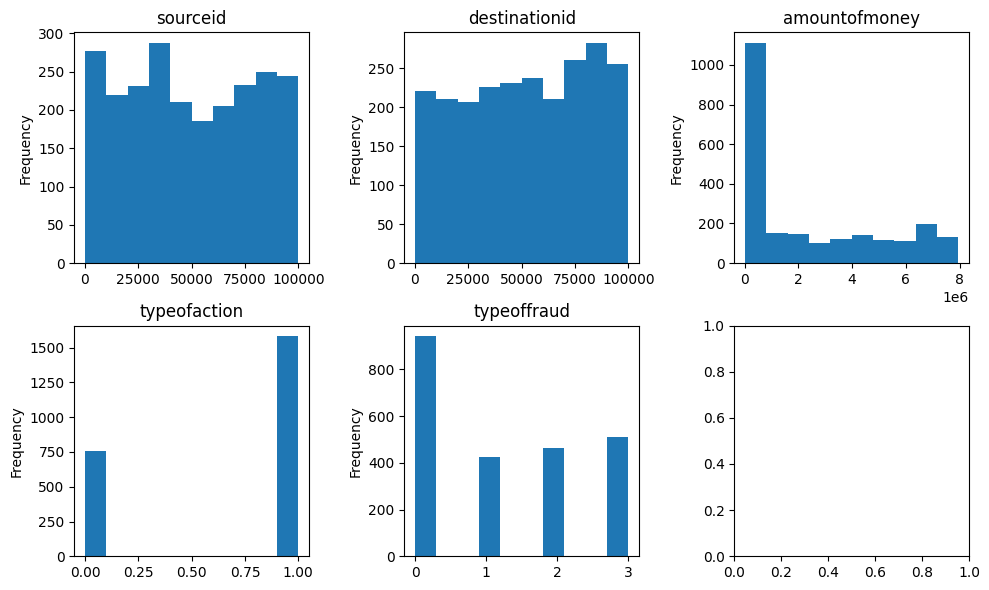

In [16]:
plot_num_cols(df, num_cols, 'hist')

In [27]:
df[num_cols].skew()

sourceid         0.042332
destinationid   -0.100452
amountofmoney    0.744457
typeofaction    -0.748785
typeoffraud      0.317553
dtype: float64

Here, `amountofmoney` is **highly positve skewed** with `0.744`.  
Also, a categorical column `typeofaction` is **highly negative skewed** with `-0.748`.

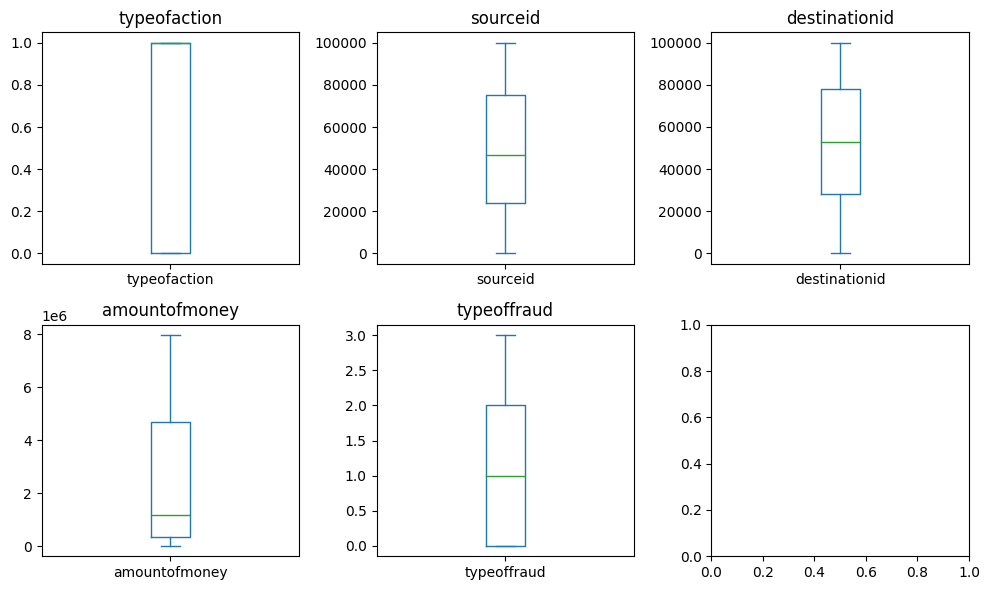

In [33]:
plot_num_cols(df, num_cols, 'box')

### Categorical Columns

In [19]:
def plot_cat_cols(
    df: pd.DataFrame,
    cat_cols: list[str],
    kind,
    subplots: tuple[int, int] = (1, 2),
    title: str | None = None,
    figsize = (10, 6),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    plt.tight_layout()

    for ax, col in zip(axes.ravel(), cat_cols):
        df[col].value_counts().sort_index().plot(kind=kind, ax=ax)

    if savefig_path:
        plt.savefig(savefig_path)

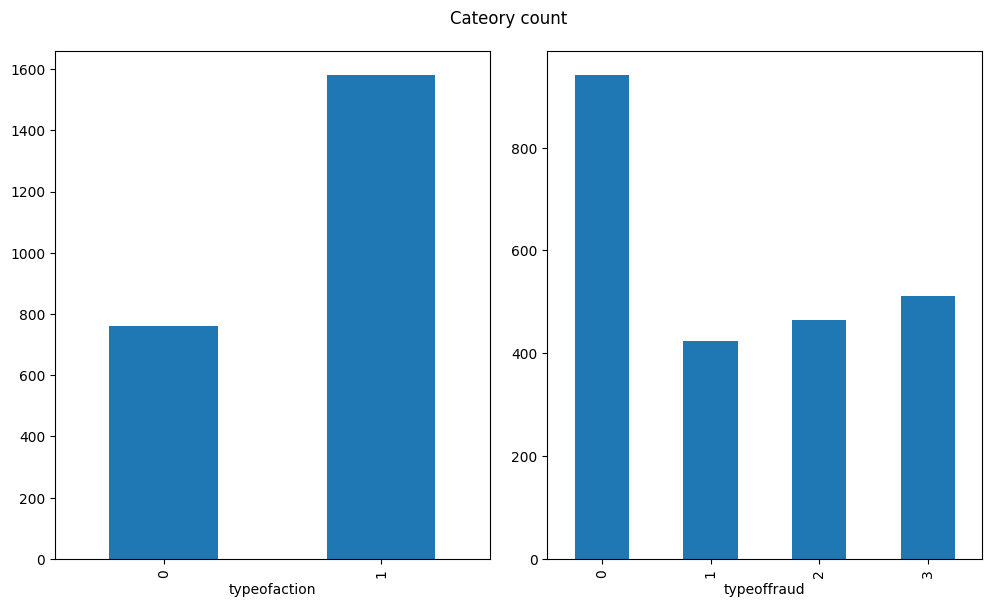

In [20]:
plot_cat_cols(df, cat_cols, 'bar', title='Cateory count')

### Multi Plots

<Axes: >

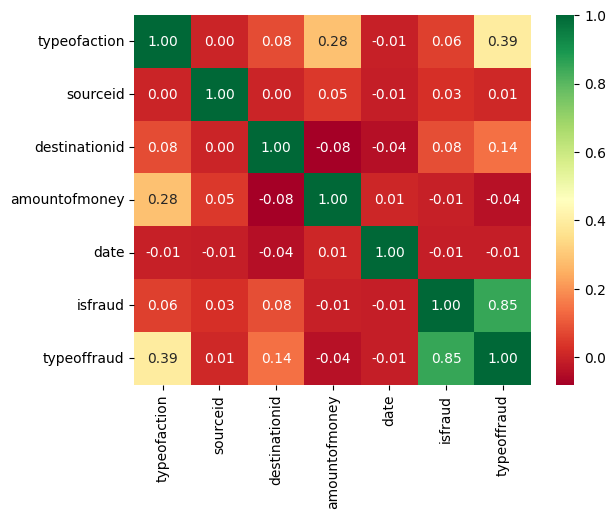

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn', cbar=True)

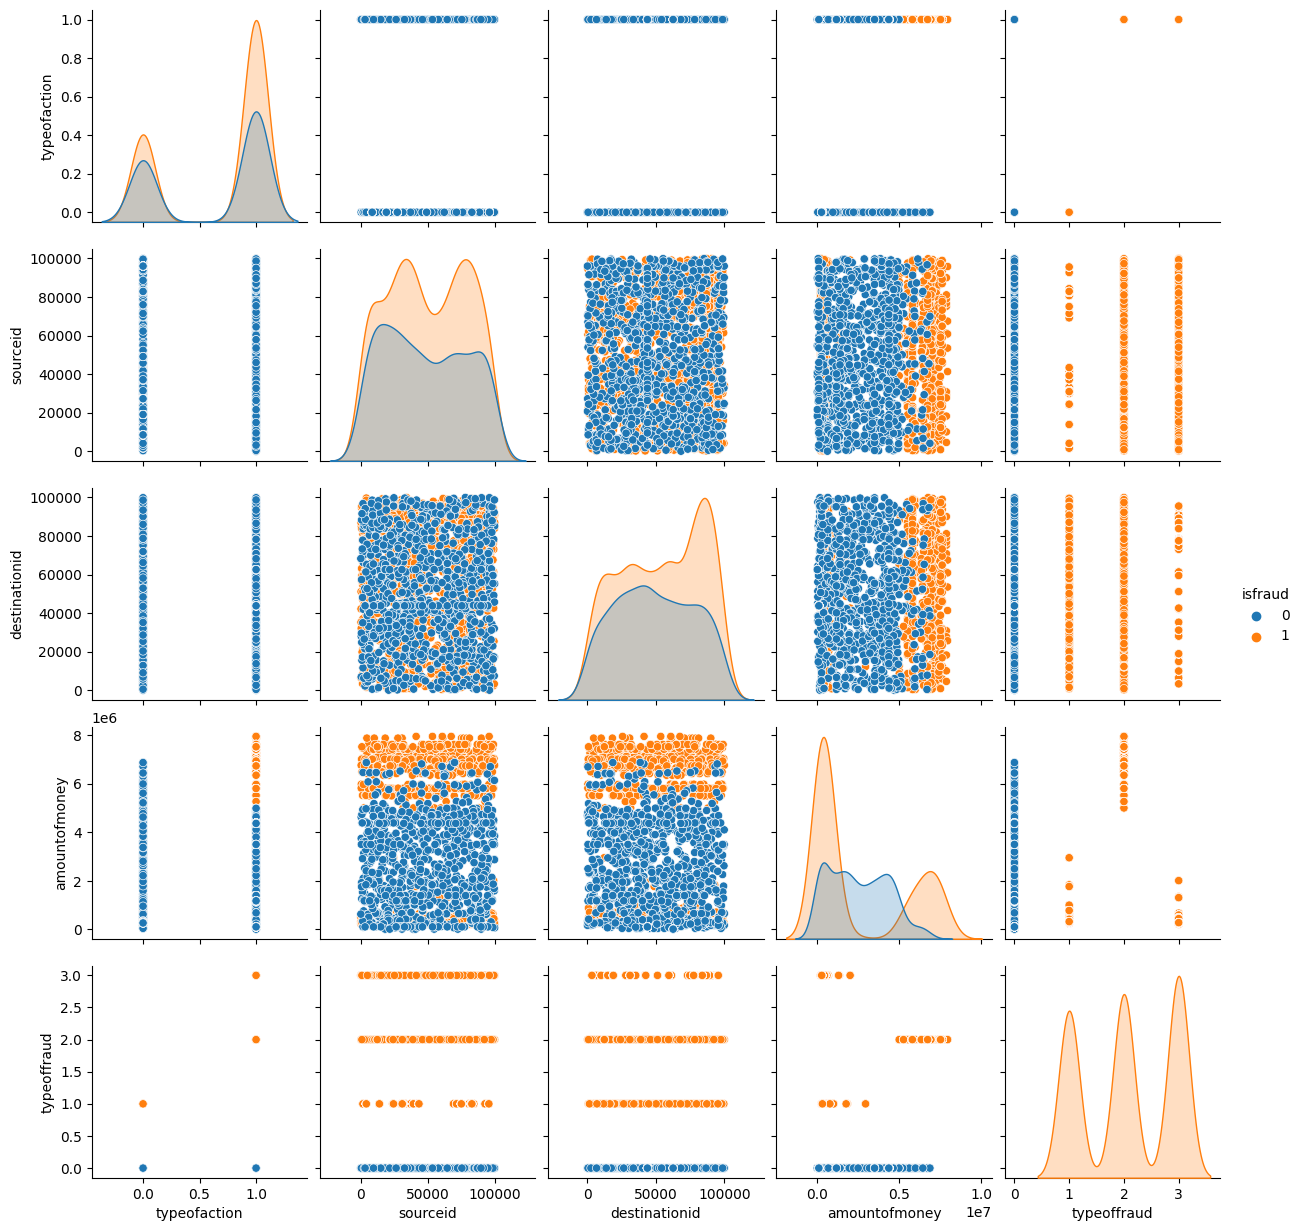

In [ ]:
sns.pairplot(df.drop(columns=[date_col]), hue=target)

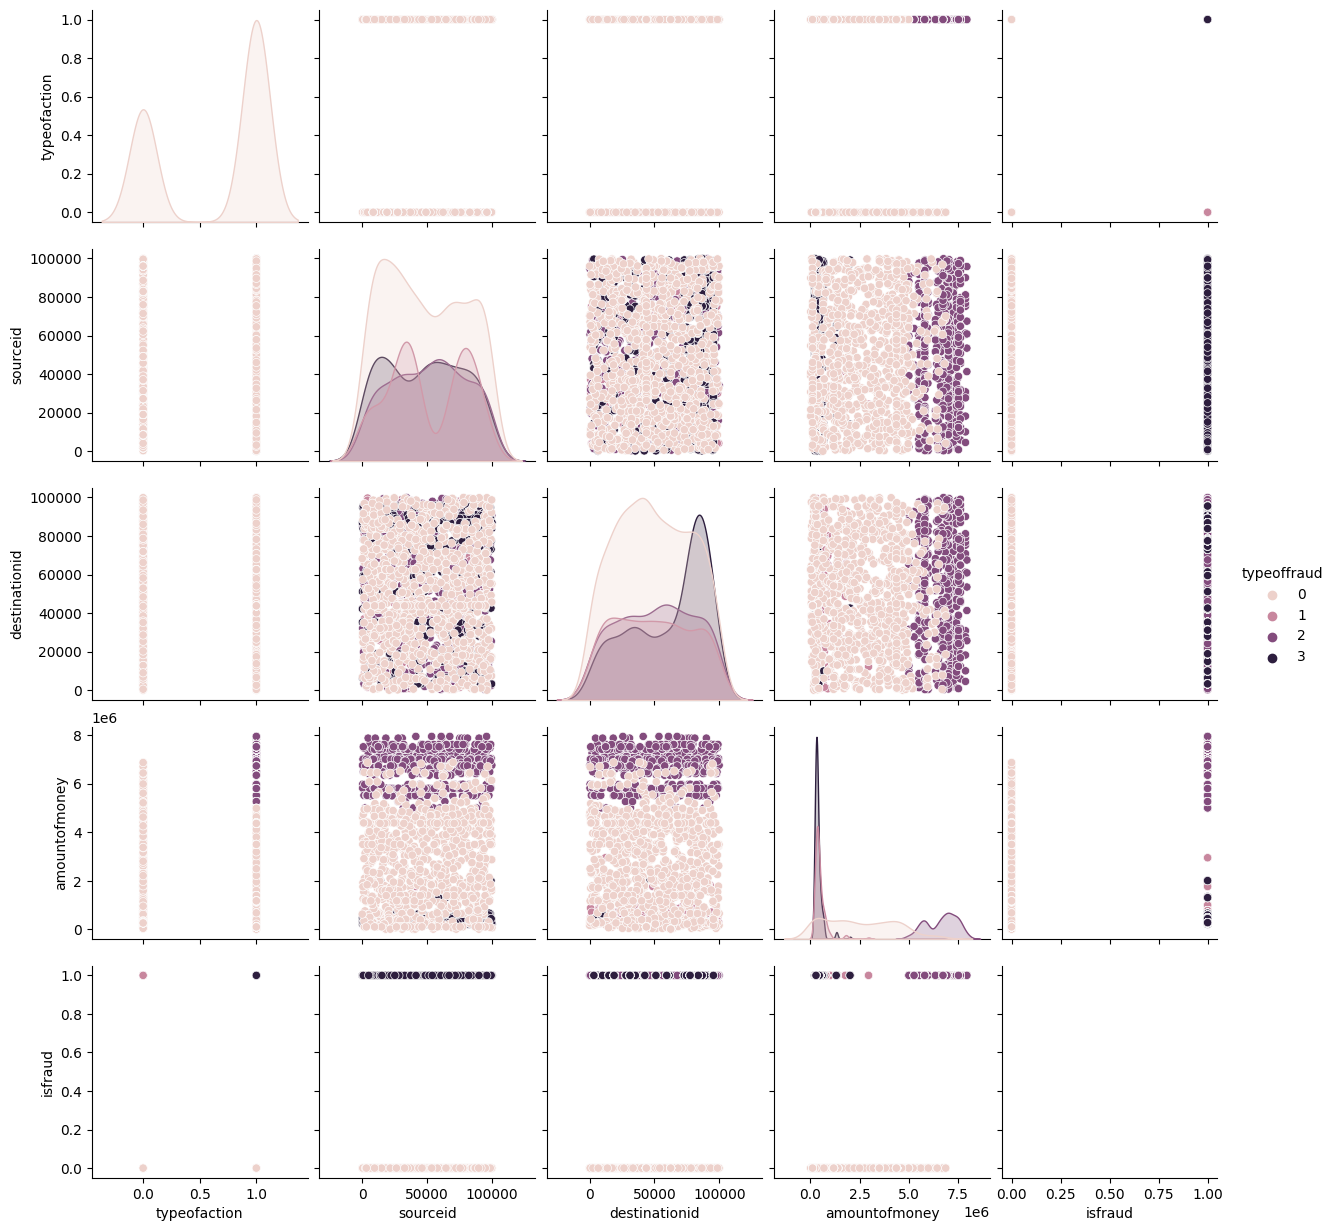

In [ ]:
sns.pairplot(df.drop(columns=[date_col]), hue='typeoffraud')

## ---